In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import joblib


In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (569, 30)
Labels shape: (569,)


In [3]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
svm_linear = SVC(kernel="linear", probability=True)

svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9736842105263158


In [7]:
svm_rbf = SVC(kernel="rbf", probability=True)

svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9824561403508771


In [8]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(
    SVC(kernel="rbf", probability=True),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01}
Best Accuracy: 0.9802197802197803


In [9]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))


Final Test Accuracy: 0.9824561403508771


In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



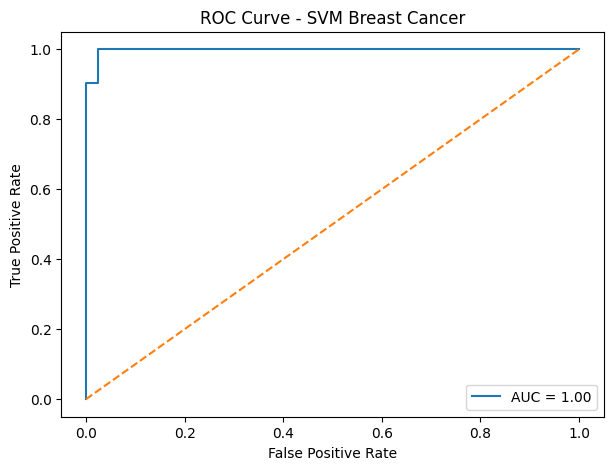

In [11]:
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Breast Cancer")
plt.legend()
plt.show()


In [12]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_model, "svm_breast_cancer_model.pkl")


['svm_breast_cancer_model.pkl']